<a href="https://colab.research.google.com/github/RuthlessActuary2023/CAS-RPM-2025-Python-Workshop/blob/main/2025_CAS_RPM_Python_Lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 3: Visualizing Data - Widgets & Charts for EDA

## Import packages & data

In [ ]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns",25)
pd.set_option("display.max_rows",250)
pd.options.display.float_format = '{:,.2f}'.format

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 90%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [ ]:
# Code to clone the github repo into colab
!pip install gitpython
import git
import os

repo_url = 'https://github.com/RuthlessActuary2023/CAS-RPM-2025-Python-Workshop.git'
repo_dir = '/content/your-repo'

# Clone if it doesn’t already exist
if not os.path.exists(repo_dir):
    git.Repo.clone_from(repo_url, repo_dir)

In [ ]:
repo_dir = '/content/your-repo'
data4 = pd.read_feather(repo_dir + '/data4.ftr')

### Make a copy that we can edit

In [ ]:
data5 = data4.copy()

### View the column names in data5

In [ ]:
[i for i in data5.columns]

['perslimbi',
 'acclimbi',
 'pol_eff_year',
 'ep_bi',
 'ep_col',
 'ee_bi',
 'ee_col',
 'incloss_bi',
 'incloss_col',
 'cc_bi',
 'cc_col',
 'zip',
 'pol_id',
 'vin_id',
 'credit',
 'commute_flag',
 'veh_count_box',
 'driver_count_box',
 'veh_age',
 'coll_symb_ntile',
 'ded_coll',
 'DrvAge_box',
 'male',
 'single',
 'widowed',
 'Date',
 'Modeled_Annual_Mileage',
 'Estimated_Current_Mileage',
 'Annual_Mileage_Estimate',
 'Number_of_Titling_Transactions',
 'Lien_Holder',
 'current_ownership_personal',
 'current_ownership_lease',
 'current_ownership_corp_govt',
 'error_current_ownership',
 'LOO_years',
 'personal_use_flag',
 'rental_use_flag',
 'taxi_use_flag',
 'comm_use_flag',
 'fleet_use_flag',
 'police_use_flag',
 'govt_use_flag',
 'nonprofit_use_flag',
 'corp_use_flag',
 'lease_flag',
 'curr_owner_odo_cnt',
 'all_owner_odo_cnt',
 'Severe_Problem_flag',
 'Branded_Title_flag',
 'Branded_Title_Loss_flag',
 'Branded_Title_Odometer_flag',
 'Branded_Title_Lemon_flag',
 'Severe_Accident_flag'

### Below is code for some easy built in visualization for record count

<Axes: >

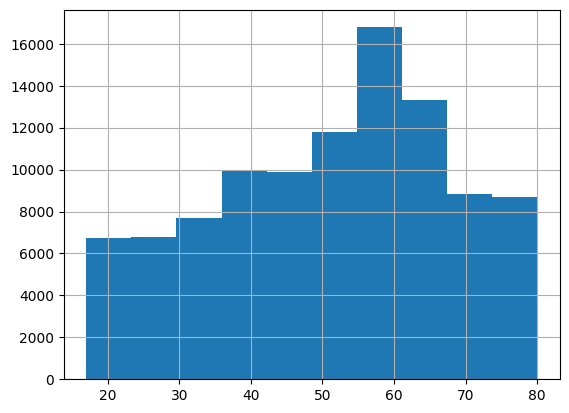

In [ ]:
data5['DrvAge_box'].hist(bins = 10)

## Make a chart to visually inspect the data
### Start with a basic one for a given field as input and bodily injury coverage
### Use our function from Lesson 2, removing 'col'

In [ ]:
facts = [i for i in data5.columns if 'ee_' in i or 'ep_' in i or 'incloss_' in i or 'cc_' in i]
ee_list = [i for i in data5.columns if 'ee_' in i]
agg_dict = {i: 'sum' for i in facts}

covs = ['bi']
ee_list.remove('ee_col')

def eda_table(data,field):
    a = data.groupby([field], dropna = False).agg(agg_dict).reset_index()

    for e in ee_list:
        a[e + '_pct'] = a[e]/a[e].sum()

    for c in covs:
        a['avg_prem_' + c] = a['ep_' + c]/a['ee_' + c]
        a['lr_' + c] = a['incloss_' + c]/a['ep_' + c]
        a['freq_' + c] = a['cc_' + c]/a['ee_' + c]
        a['sev_' + c] = a['incloss_' + c]/a['cc_' + c]
        a['pp_' + c] = a['incloss_' + c]/a['ee_' + c]

    a.drop(columns = facts, inplace = True)

    return a

b = eda_table(data5,'veh_count_box')
b

,veh_count_box,ee_bi_pct,avg_prem_bi,lr_bi,freq_bi,sev_bi,pp_bi
0,1,0.21,210.25,0.43,0.01,"10,863.91",89.69
1,2,0.39,154.86,0.62,0.01,"18,664.39",96.51
2,3,0.23,165.70,0.48,0.01,"13,992.41",79.62
3,4,0.17,183.68,0.80,0.00,"30,214.99",147.84


### Let's make a chart of exposures using matplotlib

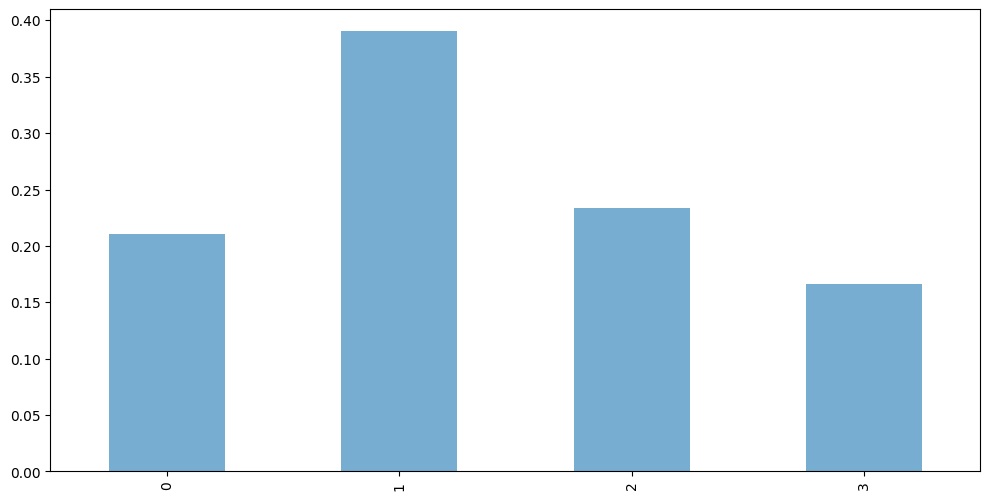

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))

b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=.6)

plt.show()

### Get the labels right

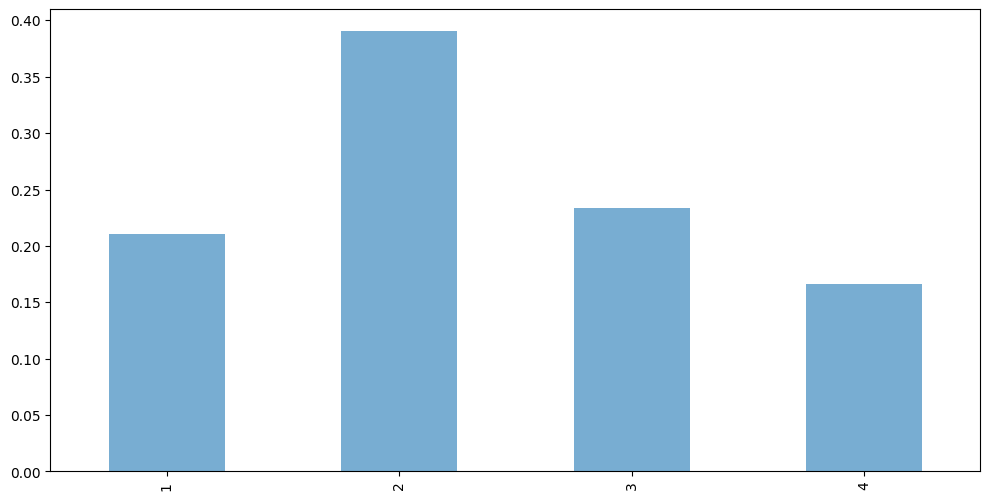

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

plt.xticks(ticks = b.index, labels = b['veh_count_box']) ### Added

plt.show()

### Add y axis label and title

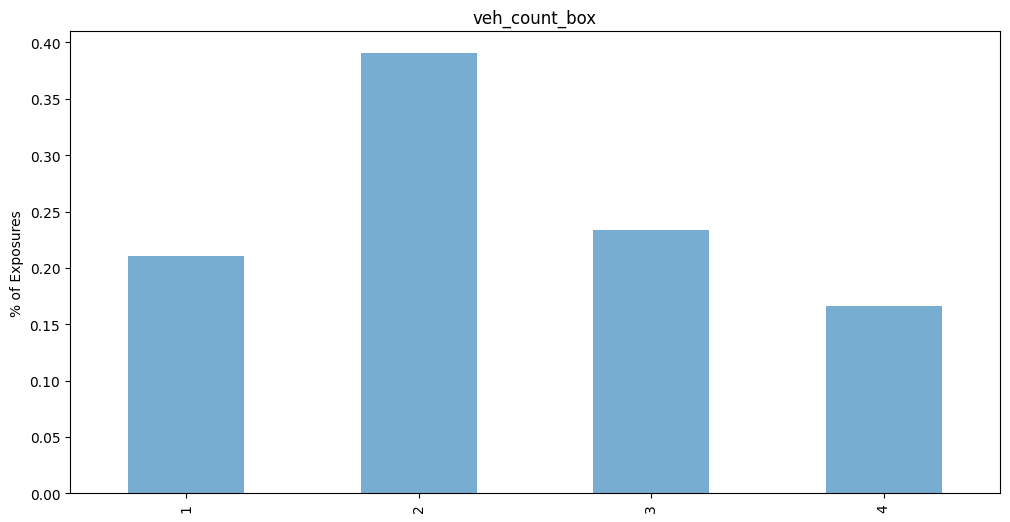

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

plt.xticks(ticks = b.index, labels = b['veh_count_box'])

ax.set(ylabel='% of Exposures', title = 'veh_count_box') ### Added

plt.show()

### Add frequency and put exposures on a 2nd axis

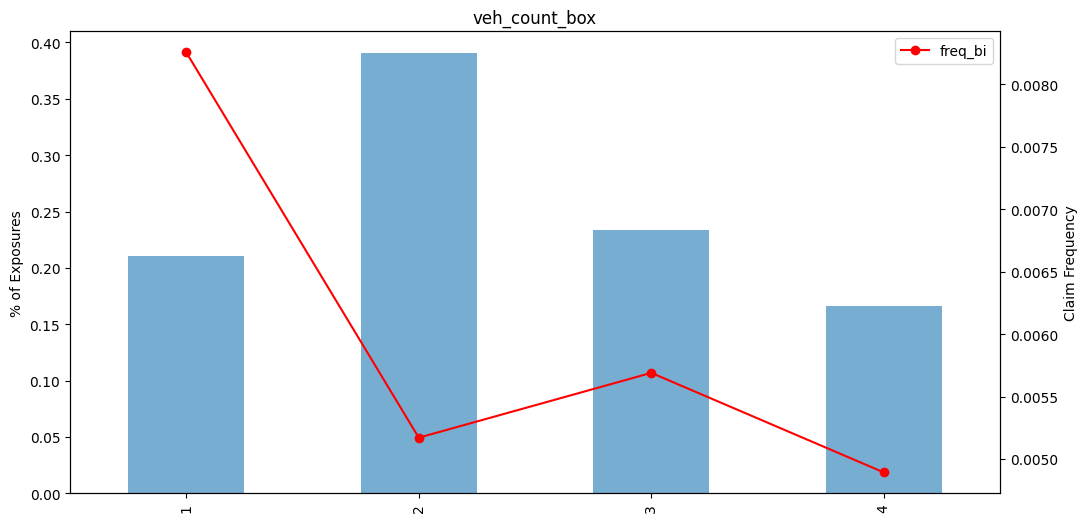

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax2  = ax.twinx() ### 2nd axis

b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)
b['freq_bi'].plot(kind='line', ax=ax2, marker='o', color = 'r', legend = '1')

plt.xticks(ticks = b.index, labels = b['veh_count_box'])

ax.set(ylabel='% of Exposures', title = 'veh_count_box')
ax2.set(ylabel='Claim Frequency') ### Added

plt.show()

### Add all of the facts we want

#### Hint: For colors - https://matplotlib.org/stable/gallery/color/named_colors.html

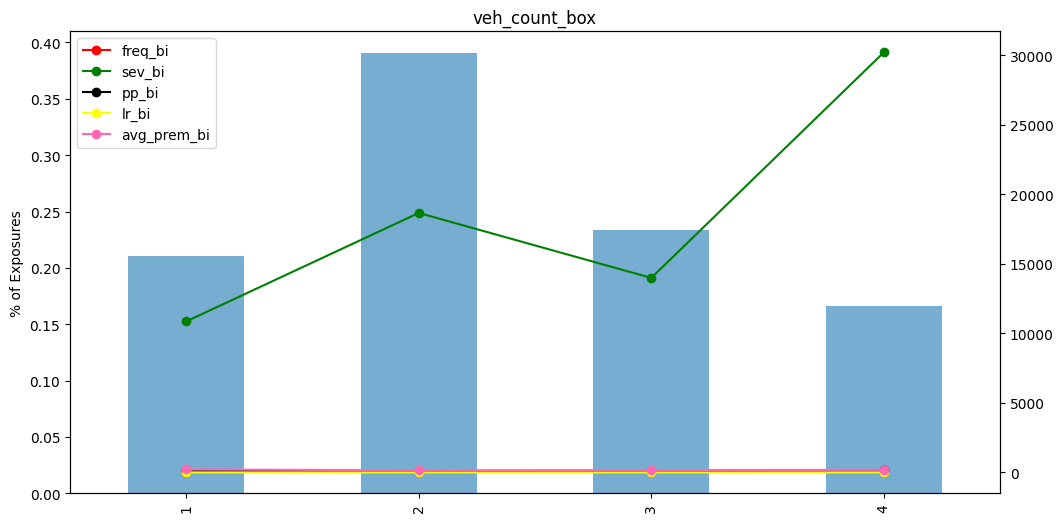

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax2  = ax.twinx()

b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)
b['freq_bi'].plot(kind='line', ax=ax2, marker='o', color = 'red', legend = '1')
b['sev_bi'].plot(kind='line', ax=ax2, marker='o', color = 'green', legend = '1')
b['pp_bi'].plot(kind='line', ax=ax2, marker='o', color = 'black', legend = '1')
b['lr_bi'].plot(kind='line', ax=ax2, marker='o', color = 'yellow', legend = '1')
b['avg_prem_bi'].plot(kind='line', ax=ax2, marker='o', color = 'hotpink', legend = '1')

plt.xticks(ticks = b.index, labels = b['veh_count_box'])

ax.set(ylabel='% of Exposures', title = 'veh_count_box')

plt.show()



### Since the scales are all off, we need to rebase everything to the mean so we can look at everything at once
### First, this is getting to be too much code, let's refactor

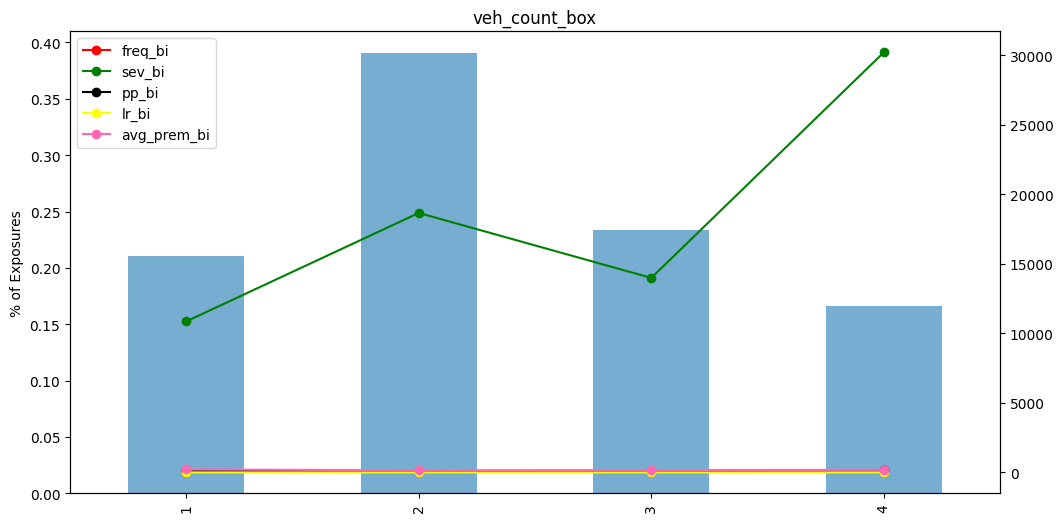

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax2  = ax.twinx()

b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

cov = 'bi'
metrics = ['freq_','sev_','pp_','lr_','avg_prem_']
colors = ['red','green','black','yellow','hotpink']

for i,m in enumerate(metrics):
    b[m + cov].plot(kind='line', ax=ax2, marker='o', color = colors[i], legend = '1')

plt.xticks(ticks = b.index, labels = b['veh_count_box'])

ax.set(ylabel='% of Exposures', title = 'veh_count_box')

plt.show()

### Next, let's rework our EDA function to rebase all metrics to the mean for a relativity

In [ ]:
facts = [i for i in data5.columns if 'ee_' in i or 'ep_' in i or 'incloss_' in i or 'cc_' in i]
ee_list = [i for i in data5.columns if 'ee_' in i]
agg_dict = {i: 'sum' for i in facts}

covs = ['bi']
ee_list.remove('ee_col')

def eda_table(data,field):
    a = data.groupby([field], dropna = False).agg(agg_dict).reset_index()

    for e in ee_list:
        a[e + '_pct'] = a[e]/a[e].sum()

    for c in covs:
        a['avg_prem_' + c] = a['ep_' + c]/a['ee_' + c]
        a['lr_' + c] = a['incloss_' + c]/a['ep_' + c]
        a['freq_' + c] = a['cc_' + c]/a['ee_' + c]
        a['sev_' + c] = a['incloss_' + c]/a['cc_' + c]
        a['pp_' + c] = a['incloss_' + c]/a['ee_' + c]

    a.drop(columns = facts, inplace = True)

    metrics = ['freq','sev','pp','lr','avg_prem']
    for c in covs:
        a['avg_prem_rel_' + c] = a['avg_prem_' + c]  /(data['ep_' + c].sum()      /data['ee_' + c].sum())
        a['lr_rel_' + c]       = a['lr_' + c]        /(data['incloss_' + c].sum() /data['ep_' + c].sum())
        a['freq_rel_' + c]     = a['freq_' + c]      /(data['cc_' + c].sum()      /data['ee_' + c].sum())
        a['sev_rel_' + c]      = a['sev_' + c]       /(data['incloss_' + c].sum() /data['cc_' + c].sum())
        a['pp_rel_' + c]       = a['pp_' + c]        /(data['incloss_' + c].sum() /data['ee_' + c].sum())

    for c in covs:
        for m in metrics:
            del a[m + '_' + c]

    return a

b = eda_table(data5,'veh_count_box')
b

,veh_count_box,ee_bi_pct,avg_prem_rel_bi,lr_rel_bi,freq_rel_bi,sev_rel_bi,pp_rel_bi
0,1,0.21,1.21,0.74,1.40,0.64,0.90
1,2,0.39,0.89,1.09,0.88,1.10,0.97
2,3,0.23,0.95,0.84,0.97,0.83,0.80
3,4,0.17,1.06,1.40,0.83,1.79,1.48


### Back to the chart and add 2nd axis label

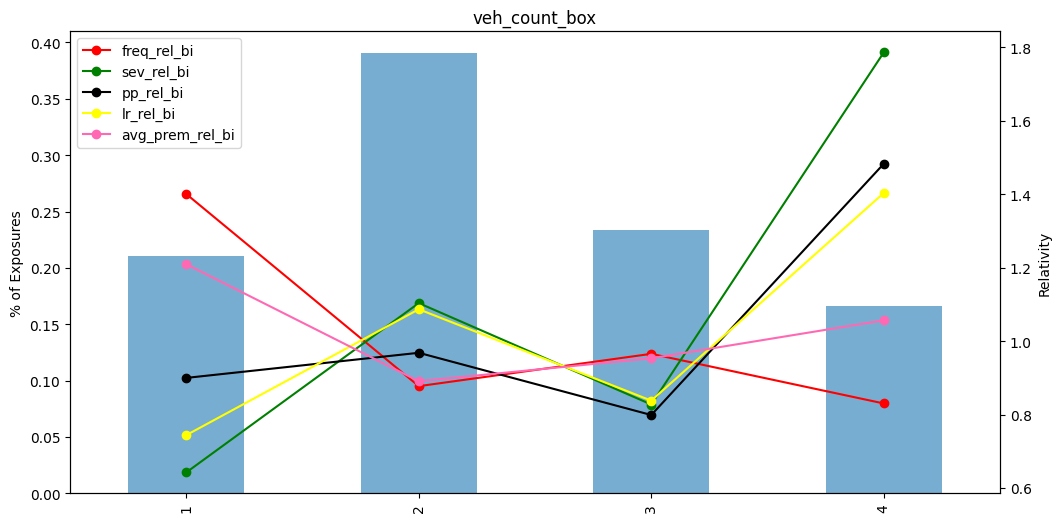

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax2  = ax.twinx()

b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

cov = 'bi'
metrics = ['freq_rel_','sev_rel_','pp_rel_','lr_rel_','avg_prem_rel_'] ### Changed
colors = ['red','green','black','yellow','hotpink']

for i,m in enumerate(metrics):
    b[m + cov].plot(kind='line', ax=ax2, marker='o', color = colors[i], legend = '1')

plt.xticks(ticks = b.index, labels = b['veh_count_box'])

ax.set(ylabel='% of Exposures', title = 'veh_count_box')
ax2.set(ylabel='Relativity')

plt.show()

### Now, we see these relationships all at once
### Let's remove the premium and loss ratio and focus on freq, sev, pp

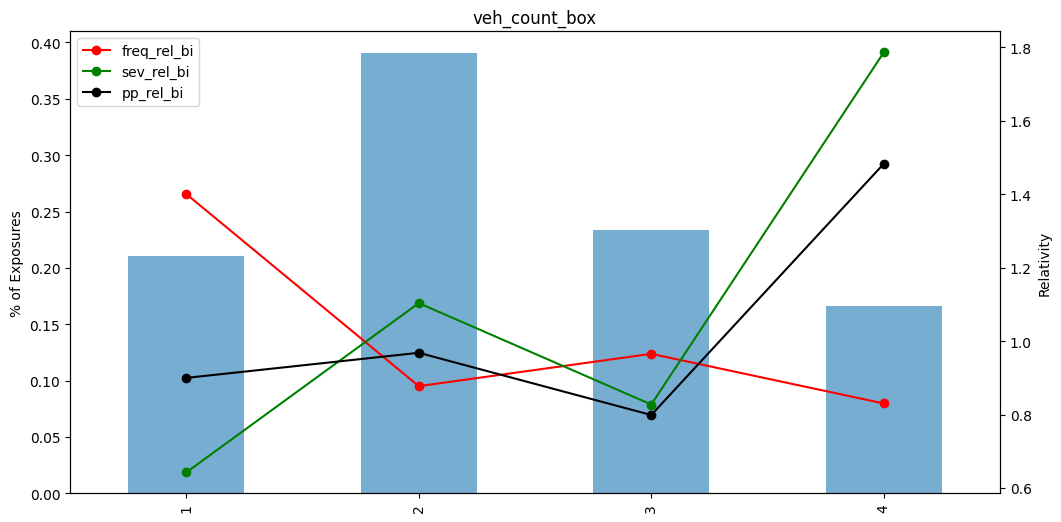

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax2  = ax.twinx()

b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

cov = 'bi'
metrics = ['freq_rel_','sev_rel_','pp_rel_'] ### Changed
colors = ['red','green','black']

for i,m in enumerate(metrics):
    b[m + cov].plot(kind='line', ax=ax2, marker='o', color = colors[i], legend = '1')

plt.xticks(ticks = b.index, labels = b['veh_count_box'])

ax.set(ylabel='% of Exposures', title = 'veh_count_box')
ax2.set(ylabel='Relativity')

plt.show()

In [ ]:
eda_table(data5,'veh_count_box')

,veh_count_box,ee_bi_pct,avg_prem_rel_bi,lr_rel_bi,freq_rel_bi,sev_rel_bi,pp_rel_bi
0,1,0.21,1.21,0.74,1.40,0.64,0.90
1,2,0.39,0.89,1.09,0.88,1.10,0.97
2,3,0.23,0.95,0.84,0.97,0.83,0.80
3,4,0.17,1.06,1.40,0.83,1.79,1.48


### Create a function out of this

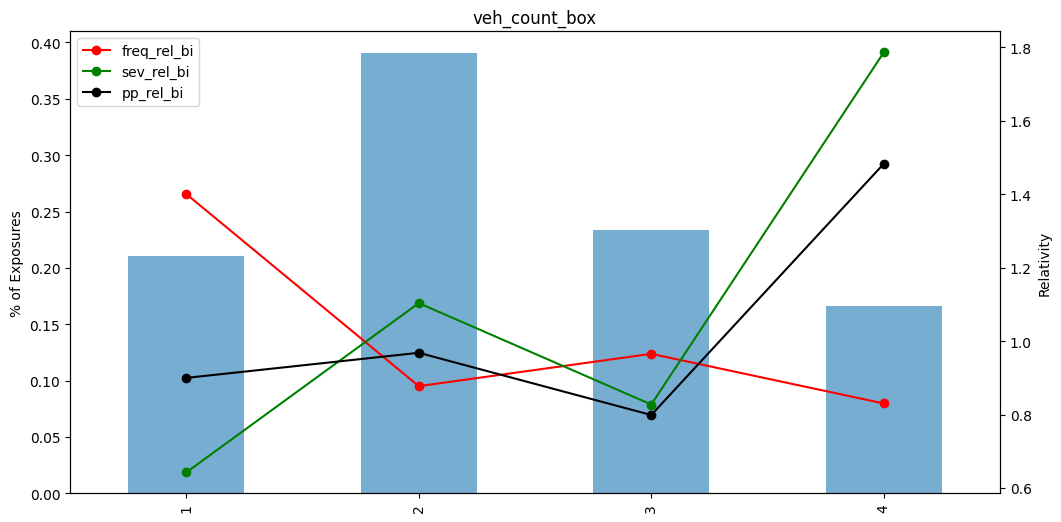

In [ ]:
facts = [i for i in data5.columns if 'ee_' in i or 'ep_' in i or 'incloss_' in i or 'cc_' in i]
ee_list = [i for i in data5.columns if 'ee_' in i]
agg_dict = {i: 'sum' for i in facts}

covs = ['bi']

cov = 'bi'
metrics = ['freq_rel_','sev_rel_','pp_rel_']
colors = ['red','green','black']

def eda_plot_bi(data,field):
    b = eda_table(data,field)

    fig, ax = plt.subplots(figsize=(12,6))
    ax2  = ax.twinx()

    b['ee_bi_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

    for i,m in enumerate(metrics):
        b[m + cov].plot(kind='line', ax=ax2, marker='o', color = colors[i], legend = '1')

    plt.xticks(ticks = b.index, labels = b[field]) ### Changed

    ax.set(ylabel='% of Exposures', title = field) ### Changed
    ax2.set(ylabel='Relativity')

    plt.show()

eda_plot_bi(data5,'veh_count_box')

### Add the ability to choose coverage

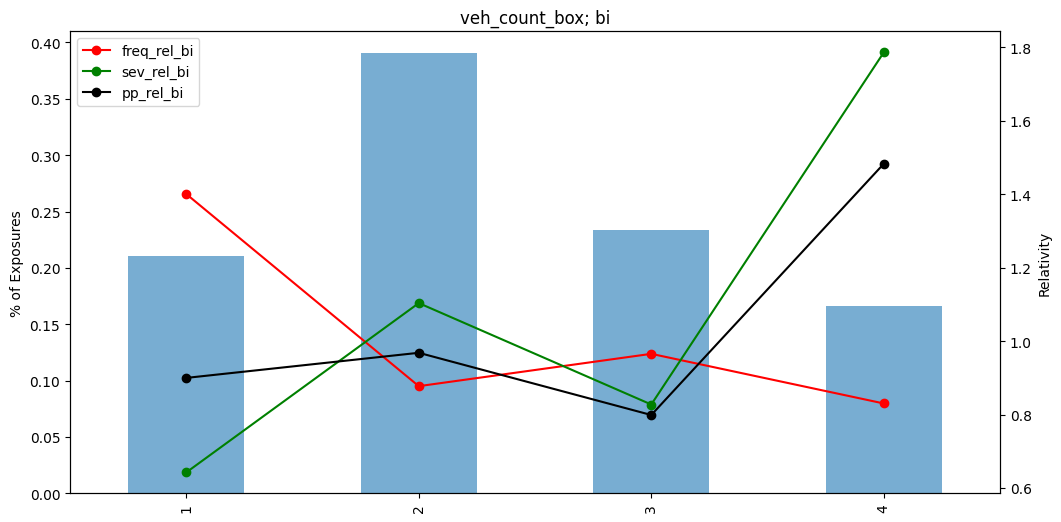

In [ ]:
facts = [i for i in data5.columns if 'ee_' in i or 'ep_' in i or 'incloss_' in i or 'cc_' in i]
ee_list = [i for i in data5.columns if 'ee_' in i]
agg_dict = {i: 'sum' for i in facts}

covs = ['bi','col']

metrics = ['freq_rel_','sev_rel_','pp_rel_']
colors = ['red','green','black']

def eda_plot(data,field,cov):
    b = eda_table(data,field)

    fig, ax = plt.subplots(figsize=(12,6))
    ax2  = ax.twinx()

    b['ee_'+ cov + '_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6) ### Changed

    for i,m in enumerate(metrics):
        b[m + cov].plot(kind='line', ax=ax2, marker='o', color = colors[i], legend = '1')

    plt.xticks(ticks = b.index, labels = b[field])

    ax.set(ylabel='% of Exposures', title = field + '; ' + cov) ### Changed
    ax2.set(ylabel='Relativity')

    plt.show()

eda_plot(data5,'veh_count_box','bi')

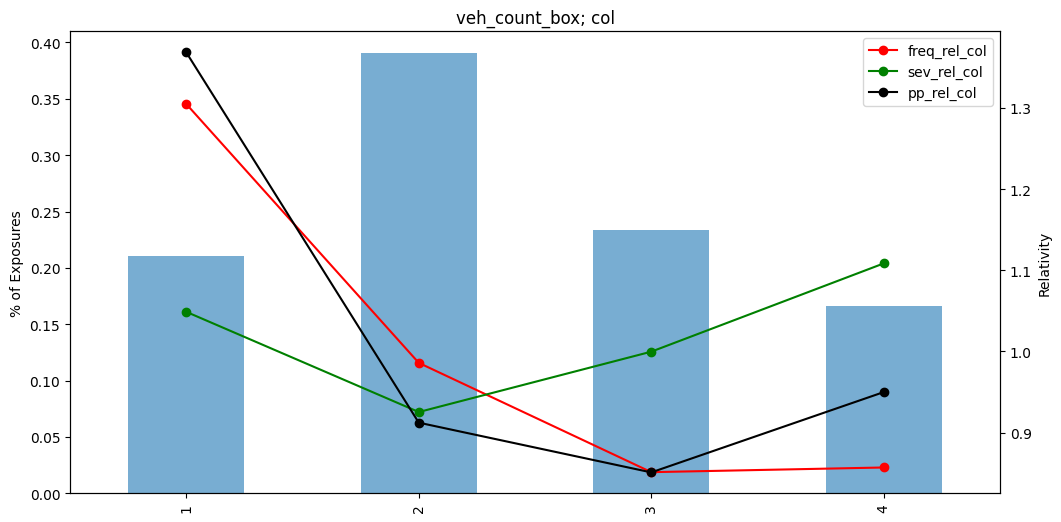

In [ ]:
eda_plot(data5,'veh_count_box','col')

## Make a widget to create the chart and finish EDA

### Make widget for bodily injury coverage just to display the table first
### Need list of fields to analyze

In [ ]:
fields = [i for i in data5.columns if i not in facts]

from __future__ import print_function
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual


def f(field):
    return eda_table(data5,field)

interact(f, field = fields); # google colab will print extra stuff at the bottom without this semicolon

interactive(children=(Dropdown(description='field', options=('pol_eff_year', 'modelyear', 'zip', 'pol_id', 'vi…

In [ ]:
fields

['perslimbi',
 'acclimbi',
 'pol_eff_year',
 'zip',
 'pol_id',
 'vin_id',
 'credit',
 'commute_flag',
 'veh_count_box',
 'driver_count_box',
 'veh_age',
 'coll_symb_ntile',
 'ded_coll',
 'DrvAge_box',
 'male',
 'single',
 'widowed',
 'Date',
 'Modeled_Annual_Mileage',
 'Estimated_Current_Mileage',
 'Annual_Mileage_Estimate',
 'Number_of_Titling_Transactions',
 'Lien_Holder',
 'current_ownership_personal',
 'current_ownership_lease',
 'current_ownership_corp_govt',
 'error_current_ownership',
 'LOO_years',
 'personal_use_flag',
 'rental_use_flag',
 'taxi_use_flag',
 'comm_use_flag',
 'fleet_use_flag',
 'police_use_flag',
 'govt_use_flag',
 'nonprofit_use_flag',
 'corp_use_flag',
 'lease_flag',
 'curr_owner_odo_cnt',
 'all_owner_odo_cnt',
 'Severe_Problem_flag',
 'Branded_Title_flag',
 'Branded_Title_Loss_flag',
 'Branded_Title_Odometer_flag',
 'Branded_Title_Lemon_flag',
 'Severe_Accident_flag',
 'Total_Loss_US_flag',
 'Stolen_flag',
 'Severe_Frame_Damage_Prob_flag',
 'Airbag_Deployed_f

### Let's remove fields from the analysis list that we don't need

In [ ]:
dont_need_list = ['zip', 'pol_id', 'vin_id','Date','error_current_ownership'] ### Added
fields = [i for i in data5.columns if i not in facts and i not in dont_need_list]

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(field):
    return eda_table(data5,field)

interact(f, field = fields);

interactive(children=(Dropdown(description='field', options=('pol_eff_year', 'modelyear', 'credit', 'commute_f…

### Expand to use eda_plot()

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

facts = [i for i in data5.columns if 'ee_' in i or 'ep_' in i or 'incloss_' in i or 'cc_' in i]
ee_list = [i for i in data5.columns if 'ee_' in i]
agg_dict = {i: 'sum' for i in facts}

covs = ['bi','col']
metrics = ['freq_rel_','sev_rel_','pp_rel_']
colors = ['red','green','black']

def eda_plot(data,field,cov):
    b = eda_table(data5,field)

    fig, ax = plt.subplots(figsize=(12,6))
    ax2  = ax.twinx()

    b['ee_'+ cov + '_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

    for i,m in enumerate(metrics):
        b[m + cov].plot(kind='line', ax=ax2, marker='o', color = colors[i], legend = '1')

    plt.xticks(ticks = b.index, labels = b[field])

    ax.set(ylabel='% of Exposures', title = field + '; ' + cov)
    ax2.set(ylabel='Relativity')

    plt.show()

### Widget code
dont_need_list = ['zip', 'pol_id', 'vin_id','Date']
fields = [i for i in data5.columns if i not in facts and i not in dont_need_list]

def f(field,cov): ### Changed
    return eda_plot(data5,field,cov) ### Changed

### Run widget

In [ ]:
interact(f, field = fields, cov = covs);

interactive(children=(Dropdown(description='field', options=('pol_eff_year', 'modelyear', 'credit', 'commute_f…

### Fix large ranges by using pd.qcut

### Let's add a statement which determines what to show based on how big the dataframe is

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def eda_table_final(data,field):
    a = data.groupby([field], dropna = False).agg(agg_dict).reset_index()

    ### Added
    if a.shape[0] > 40:
        a = data.groupby(pd.qcut(data[field], q = 25, precision = 1, duplicates='drop')).agg(agg_dict).reset_index() ### pd.qcut won't retain nan values so we will need to deal with those
    else:
        pass
    ### End Added

    for e in ee_list:
        a[e + '_pct'] = a[e]/a[e].sum()

    for c in covs:
        a['avg_prem_' + c] = a['ep_' + c]/a['ee_' + c]
        a['lr_' + c] = a['incloss_' + c]/a['ep_' + c]
        a['freq_' + c] = a['cc_' + c]/a['ee_' + c]
        a['sev_' + c] = a['incloss_' + c]/a['cc_' + c]
        a['pp_' + c] = a['incloss_' + c]/a['ee_' + c]

    a.drop(columns = facts, inplace = True)

    metrics = ['freq','sev','pp','lr','avg_prem']
    for c in covs:
        a['avg_prem_rel_' + c] = a['avg_prem_' + c]  /(data['ep_' + c].sum()      /data['ee_' + c].sum())
        a['lr_rel_' + c]       = a['lr_' + c]        /(data['incloss_' + c].sum() /data['ep_' + c].sum())
        a['freq_rel_' + c]     = a['freq_' + c]      /(data['cc_' + c].sum()      /data['ee_' + c].sum())
        a['sev_rel_' + c]      = a['sev_' + c]       /(data['incloss_' + c].sum() /data['cc_' + c].sum())
        a['pp_rel_' + c]       = a['pp_' + c]        /(data['incloss_' + c].sum() /data['ee_' + c].sum())

    for c in covs:
        for m in metrics:
            del a[m + '_' + c]

    return a

facts = [i for i in data5.columns if 'ee_' in i or 'ep_' in i or 'incloss_' in i or 'cc_' in i]
ee_list = [i for i in data5.columns if 'ee_' in i]
agg_dict = {i: 'sum' for i in facts}

covs = ['bi','col']
metrics = ['freq_rel_','sev_rel_','pp_rel_']
colors = ['red','green','black']

def eda_plot_final(data,field,cov): ### Changed
    b = eda_table_final(data5,field) ### Changed

    fig, ax = plt.subplots(figsize=(12,6))
    ax2  = ax.twinx()

    b['ee_'+ cov + '_pct'].plot.bar(stacked=False, ax=ax, alpha=0.6)

    for i,m in enumerate(metrics):
        b[m + cov].plot(kind='line', ax=ax2, marker='o', color = colors[i], legend = '1')

    plt.xticks(ticks = b.index, labels = b[field])

    ax.set(ylabel='% of Exposures', title = field + '; ' + cov)
    ax2.set(ylabel='Relativity')

    plt.show()

dont_need_list = ['zip', 'pol_id', 'vin_id','Date']
fields = [i for i in data5.columns if i not in facts and i not in dont_need_list]

def f(field,cov):
    return eda_plot_final(data5,field,cov) ### Changed

In [ ]:
interact(f, field = fields, cov = covs);

interactive(children=(Dropdown(description='field', options=('pol_eff_year', 'modelyear', 'credit', 'commute_f…

### Deal with nan values
### Make a list of fields which have nan

In [ ]:
nan_list = []
for f in fields:
    if data5.loc[data5[f].isna() == True].shape[0] > 0:
        nan_list.append(f)

nan_list

['modelyear',
 'Modeled_Annual_Mileage',
 'Estimated_Current_Mileage',
 'Annual_Mileage_Estimate',
 'Number_of_Titling_Transactions',
 'Lien_Holder',
 'current_ownership_personal',
 'current_ownership_lease',
 'current_ownership_corp_govt',
 'error_current_ownership',
 'LOO_years',
 'personal_use_flag',
 'rental_use_flag',
 'taxi_use_flag',
 'comm_use_flag',
 'fleet_use_flag',
 'police_use_flag',
 'govt_use_flag',
 'nonprofit_use_flag',
 'corp_use_flag',
 'lease_flag',
 'curr_owner_odo_cnt',
 'all_owner_odo_cnt',
 'Severe_Problem_flag',
 'Branded_Title_flag',
 'Branded_Title_Loss_flag',
 'Branded_Title_Odometer_flag',
 'Branded_Title_Lemon_flag',
 'Severe_Accident_flag',
 'Total_Loss_US_flag',
 'Stolen_flag',
 'Severe_Frame_Damage_Prob_flag',
 'Airbag_Deployed_flag',
 'Nonbrand_Fire_flag',
 'Crash_Test_flag',
 'Salvage_Auction_flag',
 'Other_Severe_Problem_flag',
 'Failed_Emissions_flag',
 'Gross_Polluter_flag',
 'Nonsevere_Accident_flag',
 'Damage_flag',
 'Collision_Repair_Facility_fl

### Looks like a lot of these are boolean - let's deal with all of them at once and convert to numeric flag for easier models later
### However the dtype isn't boolean, this was lost in the merge due to nan

In [ ]:
eda_table(data5,'Lien_Holder')

,Lien_Holder,ee_bi_pct,ee_col_pct,avg_prem_rel_bi,lr_rel_bi,freq_rel_bi,sev_rel_bi,pp_rel_bi,avg_prem_rel_col,lr_rel_col,freq_rel_col,sev_rel_col,pp_rel_col
0,False,0.90,0.90,0.99,0.98,0.97,1.01,0.98,0.97,0.99,0.97,1.00,0.97
1,True,0.08,0.08,1.10,1.25,1.42,0.97,1.38,1.33,1.06,1.43,0.98,1.41
2,NaN,0.02,0.02,0.88,0.71,0.91,0.69,0.62,0.88,0.96,0.91,0.93,0.85


### How about something that inspects the data and if the unique levels are True, False, and/or NaN we do our conversion
### Start with simple case

In [ ]:
data5[(['Lien_Holder'])].drop_duplicates()['Lien_Holder'].to_list()

[False, True, None]

### Let's put this all together
### Our fields which contain 0,1 as options will also be returned with the function

In [ ]:
match_list1 = [False, True, None]
match_list2 = [False, True]

boolean_list = []
for f in fields:
    lst = data5[([f])].drop_duplicates()[f].to_list()
    lst_len = len(lst)

    if (lst_len == 2) & (True in lst) & (False in lst):
        boolean_list.append(f)
    elif (len(lst) == 3) & (True in lst) & (False in lst) & (None in lst):
        boolean_list.append(f)

boolean_list

['commute_flag',
 'male',
 'single',
 'widowed',
 'Lien_Holder',
 'current_ownership_personal',
 'current_ownership_lease',
 'current_ownership_corp_govt',
 'error_current_ownership',
 'personal_use_flag',
 'rental_use_flag',
 'taxi_use_flag',
 'comm_use_flag',
 'fleet_use_flag',
 'govt_use_flag',
 'nonprofit_use_flag',
 'corp_use_flag',
 'lease_flag',
 'Severe_Problem_flag',
 'Branded_Title_flag',
 'Branded_Title_Loss_flag',
 'Branded_Title_Odometer_flag',
 'Branded_Title_Lemon_flag',
 'Severe_Accident_flag',
 'Total_Loss_US_flag',
 'Stolen_flag',
 'Severe_Frame_Damage_Prob_flag',
 'Airbag_Deployed_flag',
 'Nonbrand_Fire_flag',
 'Salvage_Auction_flag',
 'Other_Severe_Problem_flag',
 'Failed_Emissions_flag',
 'Gross_Polluter_flag',
 'Nonsevere_Accident_flag',
 'Damage_flag',
 'Collision_Repair_Facility_flag',
 'Potential_Frame_Damage_flag',
 'Potential_Damage_flag',
 'Odometer_Problem_flag',
 'EML_or_NAM_flag',
 'Rollback_flag',
 'Repossession_flag',
 'CPO_flag',
 'Safety_Failed_flag',

In [ ]:
for b in boolean_list:
    data5[b] = np.where(data5[b] == True, 1, 0)
    data5[b] = data5[b].astype('uint8')

### Run nan list again

In [ ]:
nan_list = []
for f in fields:
    if data5.loc[data5[f].isna() == True].shape[0] > 0:
        nan_list.append(f)

nan_list

['modelyear',
 'Modeled_Annual_Mileage',
 'Estimated_Current_Mileage',
 'Annual_Mileage_Estimate',
 'Number_of_Titling_Transactions',
 'LOO_years',
 'police_use_flag',
 'curr_owner_odo_cnt',
 'all_owner_odo_cnt',
 'Crash_Test_flag',
 'wtd_avg_travel_time',
 'diploma_ntile',
 'pop_density_ntile',
 'unemployment_ntile']

### Next, let's fix the null values in our 4 geodemographic fields which we want to set at 50
### At this point let's bring in our functions from Lesson 2

In [ ]:
def box_var(data, field, low, high, new_name = False):
    if new_name == False:
        data[field + '_box'] = np.where(data[field] <= low, low, np.where(data[field] >= high, high, data[field]))
    else:
        data[new_name] = np.where(data[field] <= low, low, np.where(data[field] >= high, high, data[field]))

def fillna(data, field, new_name, specific_value = False):
    if specific_value == False:
        data[new_name] = data[field].fillna(data[field].mode().values[0])
    else:
        data[new_name] = data[field].fillna(specific_value)

### Let's simply override the existing fields - we are working with a copy of the data so we can always compare to data4 if we have some problem

In [ ]:
geos = ['wtd_avg_travel_time', 'diploma_ntile', 'pop_density_ntile', 'unemployment_ntile']

for g in geos:
    fillna(data5, g, g, specific_value = 50)

In [ ]:
nan_list = []
for f in fields:
    if data5.loc[data5[f].isna() == True].shape[0] > 0:
        nan_list.append(f)

nan_list

['modelyear',
 'Modeled_Annual_Mileage',
 'Estimated_Current_Mileage',
 'Annual_Mileage_Estimate',
 'Number_of_Titling_Transactions',
 'LOO_years',
 'police_use_flag',
 'curr_owner_odo_cnt',
 'all_owner_odo_cnt',
 'Crash_Test_flag']

### Crash_Test_flag & police_use_flag - why are they still here?

In [ ]:
eda_table(data5,'Crash_Test_flag')

,Crash_Test_flag,ee_bi_pct,ee_col_pct,avg_prem_rel_bi,lr_rel_bi,freq_rel_bi,sev_rel_bi,pp_rel_bi,avg_prem_rel_col,lr_rel_col,freq_rel_col,sev_rel_col,pp_rel_col
0,False,0.98,0.98,1.00,1.01,1.00,1.01,1.01,1.00,1.00,1.00,1.00,1.00
1,NaN,0.02,0.02,0.88,0.71,0.91,0.69,0.62,0.88,0.96,0.91,0.93,0.85


In [ ]:
eda_table(data5,'police_use_flag')

,police_use_flag,ee_bi_pct,ee_col_pct,avg_prem_rel_bi,lr_rel_bi,freq_rel_bi,sev_rel_bi,pp_rel_bi,avg_prem_rel_col,lr_rel_col,freq_rel_col,sev_rel_col,pp_rel_col
0,False,0.98,0.98,1.00,1.01,1.00,1.01,1.01,1.00,1.00,1.00,1.00,1.00
1,NaN,0.02,0.02,0.88,0.71,0.91,0.69,0.62,0.88,0.96,0.91,0.93,0.85


### Looks like we need to simply remove them

In [ ]:
del data5['Crash_Test_flag'], data5['police_use_flag']
fields.remove('Crash_Test_flag')
fields.remove('police_use_flag')

nan_list = []
for f in fields:
    if data5.loc[data5[f].isna() == True].shape[0] > 0:
        nan_list.append(f)

nan_list

['modelyear',
 'Modeled_Annual_Mileage',
 'Estimated_Current_Mileage',
 'Annual_Mileage_Estimate',
 'Number_of_Titling_Transactions',
 'LOO_years',
 'curr_owner_odo_cnt',
 'all_owner_odo_cnt']

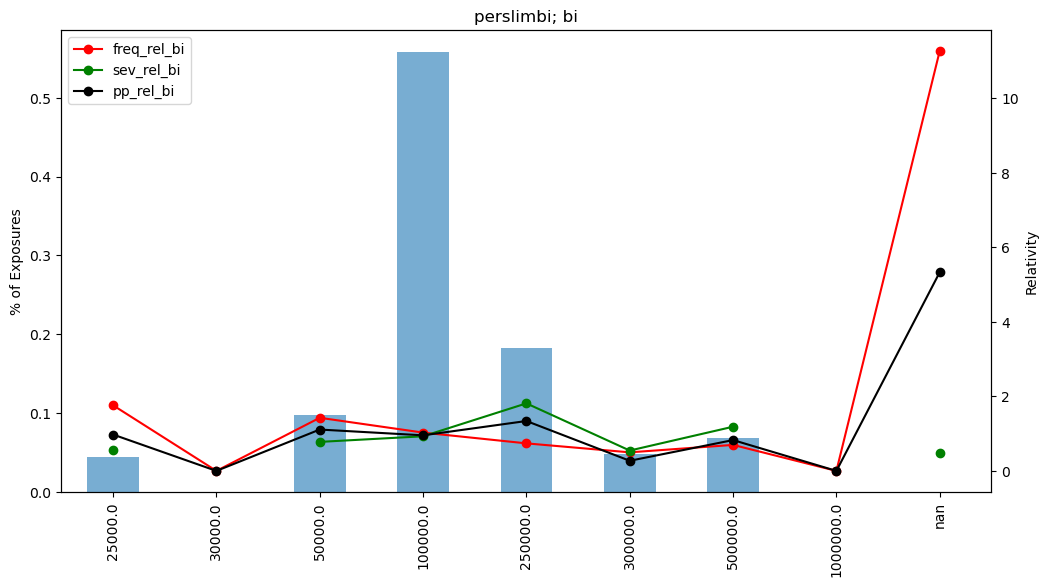

interactive(children=(Dropdown(description='field', options=('perslimbi', 'acclimbi', 'veh_age', 'Modeled_Annu…

<function __main__.f(field, cov)>

In [ ]:
def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = nan_list, cov = covs)

### For all remaining items, negative values imply missing
### Let's turn any negative values into nan

In [ ]:
for n in nan_list:
    data5[n] = np.where(data5[n] < 0, np.nan, data5[n])

In [ ]:
def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = nan_list, cov = covs);

# Leave this futurewarning here to let people see how they work

interactive(children=(Dropdown(description='field', options=('modelyear', 'Modeled_Annual_Mileage', 'Estimated…

### Let's round the mileage data to the nearest 1000 and current odometer to 10000

In [ ]:
nan_list

['modelyear',
 'Modeled_Annual_Mileage',
 'Estimated_Current_Mileage',
 'Annual_Mileage_Estimate',
 'Number_of_Titling_Transactions',
 'LOO_years',
 'curr_owner_odo_cnt',
 'all_owner_odo_cnt']

In [ ]:
miles_list = ['Modeled_Annual_Mileage', 'Annual_Mileage_Estimate']

for m in miles_list:
    data5[m] = round(data5[m]/1000,0)*1000

data5['Estimated_Current_Mileage'] = round(data5['Estimated_Current_Mileage']/10000,0)*10000

In [ ]:
def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = nan_list, cov = covs);

interactive(children=(Dropdown(description='field', options=('modelyear', 'Modeled_Annual_Mileage', 'Estimated…

### Now let's apply some box logic

In [ ]:
box_var(data5, 'Modeled_Annual_Mileage', 5000, 17000, new_name = 'Modeled_Annual_Mileage')
box_var(data5, 'Estimated_Current_Mileage', 10000, 200000, new_name = 'Estimated_Current_Mileage')
box_var(data5, 'Annual_Mileage_Estimate', 3000, 30000, new_name = 'Annual_Mileage_Estimate')
box_var(data5, 'Number_of_Titling_Transactions', 1, 6, new_name = 'Number_of_Titling_Transactions')
box_var(data5, 'LOO_years', 0, 12, new_name = 'LOO_years')
box_var(data5, 'curr_owner_odo_cnt', 0, 25, new_name = 'curr_owner_odo_cnt')
box_var(data5, 'all_owner_odo_cnt', 0, 40, new_name = 'all_owner_odo_cnt')

In [ ]:
def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = nan_list, cov = covs);

interactive(children=(Dropdown(description='field', options=('modelyear', 'Modeled_Annual_Mileage', 'Estimated…

### Finally we need to fix those nan values
### Let's use the mean but we also need to make a null flag for GLM purposes
### Let's modify our fillna function to do this

In [ ]:
def fillna_mean_with_flag(data, field):
    data[field + '_null_flag'] = np.where(data[field].isna() == True, 1, 0).astype('uint8')
    data[field] = data[field].fillna(data[field].mean())

for n in nan_list:
    fillna_mean_with_flag(data5, n)

In [ ]:
def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = nan_list, cov = covs);

interactive(children=(Dropdown(description='field', options=('modelyear', 'Modeled_Annual_Mileage', 'Estimated…

### Did we miss anything?  Let's look everything over

In [ ]:
fields = [i for i in data5.columns if i not in facts and i not in ['zip','pol_id','vin_id','Date']]

def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = fields, cov = covs);

interactive(children=(Dropdown(description='field', options=('pol_eff_year', 'modelyear', 'credit', 'commute_f…

### Looks like a lot of these have very low exposures in the cases of having 2 levels
### Let's create a simple print showing all 2 level fields and their corresponding lowest exposure % of the data
### First, let's just be sure we always have at least 2 levels

In [ ]:
fields = [i for i in data5.columns if i not in facts and i not in ['zip','pol_id','vin_id','Date']]

for f in fields:
    a = data5.groupby([f]).agg({'ee_bi': 'sum'}).reset_index()
    if a.shape[0] < 2:
        print(f)

### Great, every field has at least 2 levels

In [ ]:
for f in fields:
    a = data5.groupby([f]).agg({'ee_bi': 'sum'}).reset_index()
    if a.shape[0] == 2:
        a['ee_bi_pct'] = a['ee_bi']/a['ee_bi'].sum()

        min_bi_pct = a['ee_bi_pct'].min()

        print(f + '; ' + str(round(min_bi_pct,3)))

commute_flag; 0.451
male; 0.484
single; 0.3
widowed; 0.039
Lien_Holder; 0.076
current_ownership_personal; 0.196
current_ownership_lease; 0.093
current_ownership_corp_govt; 0.019
error_current_ownership; 0.064
personal_use_flag; 0.19
rental_use_flag; 0.068
taxi_use_flag; 0.0
comm_use_flag; 0.03
fleet_use_flag; 0.018
govt_use_flag; 0.001
nonprofit_use_flag; 0.0
corp_use_flag; 0.028
lease_flag; 0.237
Severe_Problem_flag; 0.029
Branded_Title_flag; 0.014
Branded_Title_Loss_flag; 0.01
Branded_Title_Odometer_flag; 0.004
Branded_Title_Lemon_flag; 0.001
Severe_Accident_flag; 0.015
Total_Loss_US_flag; 0.01
Stolen_flag; 0.003
Severe_Frame_Damage_Prob_flag; 0.002
Airbag_Deployed_flag; 0.007
Nonbrand_Fire_flag; 0.0
Salvage_Auction_flag; 0.001
Other_Severe_Problem_flag; 0.023
Failed_Emissions_flag; 0.016
Gross_Polluter_flag; 0.0
Nonsevere_Accident_flag; 0.194
Damage_flag; 0.062
Collision_Repair_Facility_flag; 0.018
Potential_Frame_Damage_flag; 0.002
Potential_Damage_flag; 0.249
Odometer_Problem_flag

### Let's set an exposure threshold of at least 1% of the data
### If the lowest % of total exposures is < .01, let's eliminate that from our dataset

In [ ]:
remove_list = []
for f in fields:
    a = data5.groupby([f]).agg({'ee_bi': 'sum'}).reset_index()
    if a.shape[0] == 2:
        a['ee_bi_pct'] = a['ee_bi']/a['ee_bi'].sum()

        min_bi_pct = a['ee_bi_pct'].min()

        if min_bi_pct < .01:
            remove_list.append(f)

for r in remove_list:
    del data5[r]
    fields.remove(r)
    print(r)

taxi_use_flag
govt_use_flag
nonprofit_use_flag
Branded_Title_Odometer_flag
Branded_Title_Lemon_flag
Total_Loss_US_flag
Stolen_flag
Severe_Frame_Damage_Prob_flag
Airbag_Deployed_flag
Nonbrand_Fire_flag
Salvage_Auction_flag
Gross_Polluter_flag
Potential_Frame_Damage_flag
EML_or_NAM_flag
Rollback_flag
Safety_Failed_flag
Recycler_Inv_flag
Scrapped_flag


In [ ]:
def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = fields, cov = covs);

interactive(children=(Dropdown(description='field', options=('pol_eff_year', 'modelyear', 'credit', 'commute_f…

### Final modifications

In [ ]:
box_var(data5, 'credit', 1, 10, new_name = 'credit')
box_var(data5, 'limit_bi', 50, 500, new_name = 'limit_bi')

del data5['error_current_ownership']
fields.remove('error_current_ownership')

In [ ]:
def f(field,cov):
    return eda_plot_final(data5,field,cov)

interact(f, field = fields, cov = covs);

interactive(children=(Dropdown(description='field', options=('pol_eff_year', 'modelyear', 'credit', 'commute_f…

### Correlation Matrix

In [ ]:
corr = data5[(fields)].corr()
corr.style.background_gradient(cmap='coolwarm')

,pol_eff_year,modelyear,credit,commute_flag,veh_count_box,driver_count_box,veh_age_box,coll_symb_ntile,limit_bi,ded_coll,DrvAge_box,male,single,widowed,Modeled_Annual_Mileage,Estimated_Current_Mileage,Annual_Mileage_Estimate,Number_of_Titling_Transactions,Lien_Holder,current_ownership_personal,current_ownership_lease,current_ownership_corp_govt,LOO_years,personal_use_flag,rental_use_flag,comm_use_flag,fleet_use_flag,corp_use_flag,lease_flag,curr_owner_odo_cnt,all_owner_odo_cnt,Severe_Problem_flag,Branded_Title_flag,Branded_Title_Loss_flag,Severe_Accident_flag,Other_Severe_Problem_flag,Failed_Emissions_flag,Nonsevere_Accident_flag,Damage_flag,Collision_Repair_Facility_flag,Potential_Damage_flag,Odometer_Problem_flag,Repossession_flag,CPO_flag,wtd_avg_travel_time,diploma_ntile,pop_density_ntile,unemployment_ntile,modelyear_null_flag,Modeled_Annual_Mileage_null_flag,Estimated_Current_Mileage_null_flag,Annual_Mileage_Estimate_null_flag,Number_of_Titling_Transactions_null_flag,LOO_years_null_flag,curr_owner_odo_cnt_null_flag,all_owner_odo_cnt_null_flag
pol_eff_year,1.000000,0.247976,-0.035904,0.018760,0.001201,0.014401,-0.005582,0.026855,0.013917,0.022099,0.029786,-0.000143,-0.017278,0.025755,0.109874,-0.009773,-0.004125,-0.006356,-0.008532,-0.005306,0.030959,-0.009541,-0.009396,-0.005929,-0.017007,0.004101,-0.000090,-0.016487,0.035458,0.057389,0.076958,-0.003545,-0.008352,-0.009990,-0.001562,-0.003262,-0.008102,-0.008375,0.102284,-0.014130,0.030404,-0.000577,-0.008343,0.032061,-0.007877,-0.010621,0.032906,0.014840,-0.004837,-0.043673,-0.052750,-0.050719,-0.026581,-0.026581,-0.043355,-0.043355
modelyear,0.247976,1.000000,0.064863,0.086413,-0.079305,0.032486,-0.918914,0.038383,0.063727,0.083959,-0.055250,0.001171,-0.042576,-0.010109,0.594030,-0.579083,0.155143,-0.452610,0.140301,-0.250830,0.283078,0.013184,-0.502320,-0.260866,0.000718,-0.067083,-0.042840,-0.136156,0.122333,-0.087027,-0.373539,-0.121499,-0.115661,-0.079526,-0.050996,-0.083722,-0.149321,-0.236297,0.017862,-0.057144,-0.231199,-0.125626,-0.081309,0.031289,0.005873,-0.039285,0.049157,0.028719,-0.000000,-0.030584,-0.240416,0.035866,0.158529,0.158529,-0.029776,-0.029776
credit,-0.035904,0.064863,1.000000,0.093296,-0.068809,-0.011282,-0.073496,0.044863,-0.203823,0.094609,-0.306568,-0.018893,0.126354,-0.052361,0.045186,0.028534,0.128293,0.125114,0.119947,-0.082537,0.092619,0.005872,-0.230336,-0.079292,0.035768,0.030747,0.008581,-0.010251,0.102049,-0.128488,0.011599,0.006982,0.012036,0.012109,-0.003751,0.006520,0.007102,0.049640,0.022996,0.008658,0.050955,0.001631,0.054720,0.021906,-0.031315,-0.014077,0.042080,-0.021112,0.001746,0.012360,-0.068496,0.088568,0.014541,0.014541,0.013717,0.013717
commute_flag,0.018760,0.086413,0.093296,1.000000,-0.058613,0.045403,-0.077234,0.003050,-0.035940,0.035059,-0.208768,-0.012598,0.054859,-0.094481,0.038711,0.020035,0.093464,-0.049635,0.005386,-0.004494,0.042946,-0.008639,-0.030898,-0.006021,-0.013319,-0.004255,0.002921,-0.018132,0.047786,0.053225,0.016409,-0.018263,-0.022820,-0.018824,-0.009384,-0.011753,-0.015947,0.002127,0.008025,0.008851,0.004713,-0.022339,-0.007915,0.022488,-0.005161,-0.046538,0.078988,-0.031578,-0.026039,-0.034962,-0.072065,-0.057809,-0.022709,-0.022709,-0.036492,-0.036492
veh_count_box,0.001201,-0.079305,-0.068809,-0.058613,1.000000,0.642301,0.071286,0.060448,0.093046,0.066432,-0.153828,0.058053,-0.164601,-0.156177,-0.008735,0.053666,0.044592,0.058856,-0.014487,-0.003126,-0.038147,0.038837,0.012658,0.000216,-0.021416,0.043556,0.008656,0.028175,-0.028653,-0.067400,-0.006958,0.030014,0.044947,0.036819,0.012696,0.021354,-0.006157,0.009729,-0.005225,0.004658,0.006202,0.016171,-0.000804,-0.003092,0.020522,0.057491,-0.114189,0.038330,0.002678,0.006661,0.075118,0.056768,0.008795,0.008795,0.008104,0.008104
driver_count_box,0.014401,0.032486,-0.011282,0.045403,0.642301,1.000000,-0.027774,0.024906,0.108870,0.108178,-0.230375,0.034750,-0.161516,-0.178591,0.035886,0.034444,0.081814,-0.000018,-0.005048,-0.014064,0.018138,0.016027

# Group Work

### Lesson 3 Exercise 1
#### Modify the widget so that the chart displays % of Exposures, Avg Premium Relativity, and Loss Ratio Relativity
#### This requires changing one or more of the items within the block of code where eda_table_final & eda_plot_final are created so that the functions give you the output you want